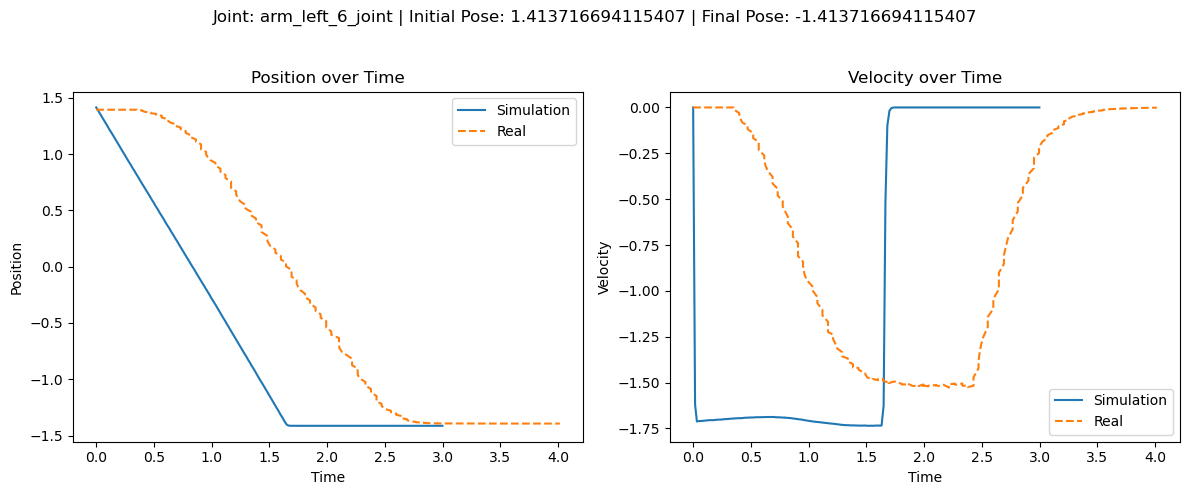

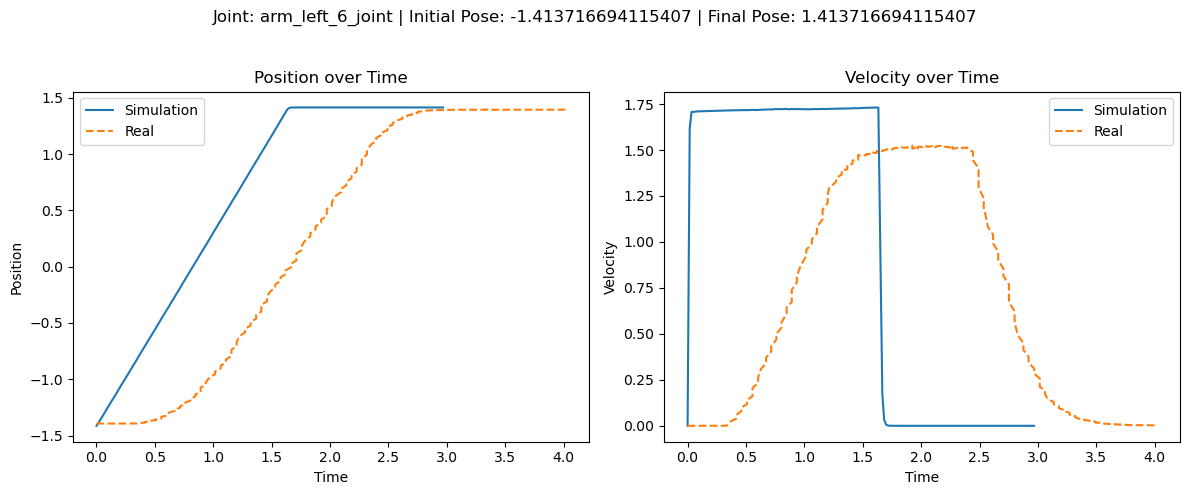

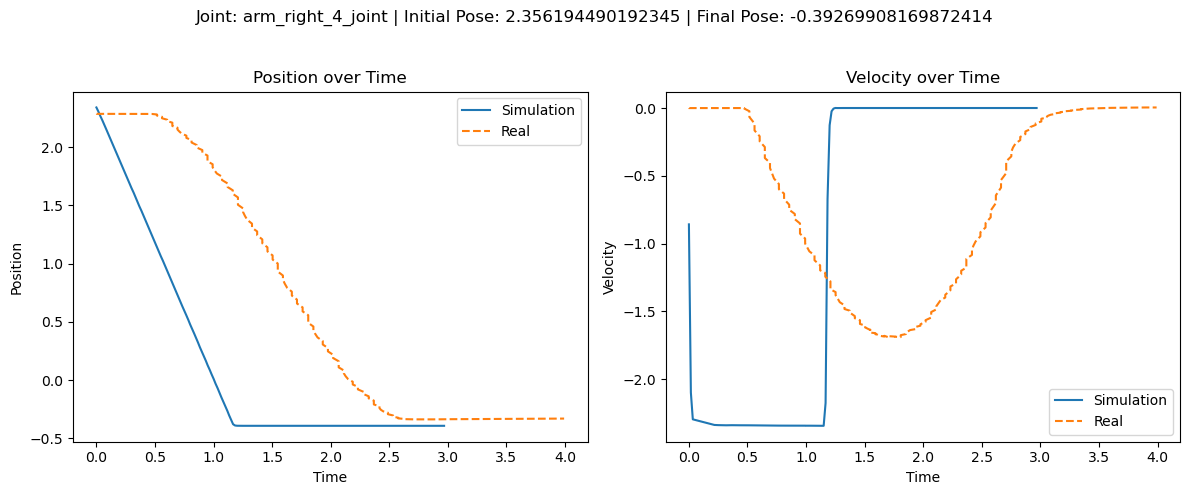

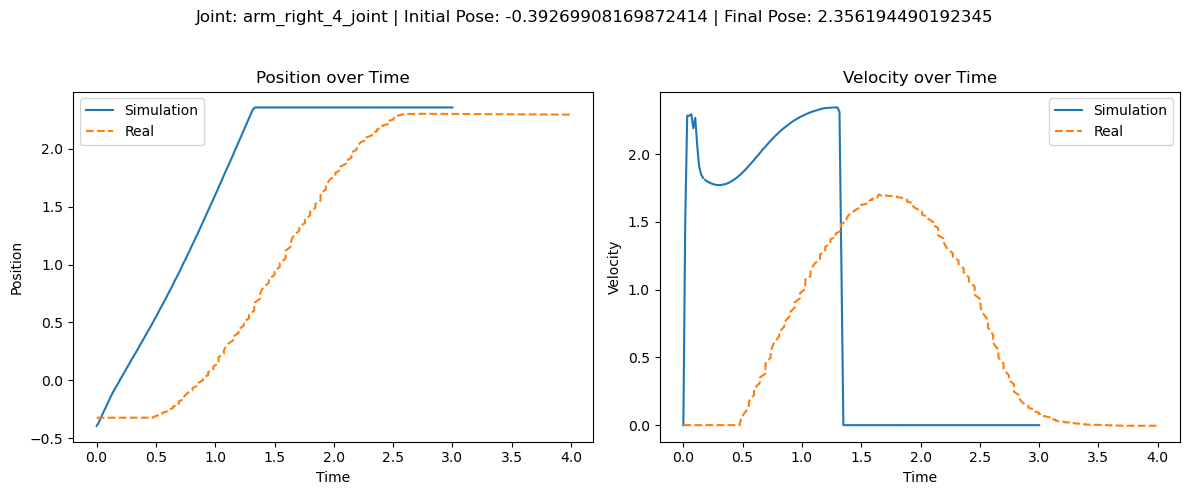

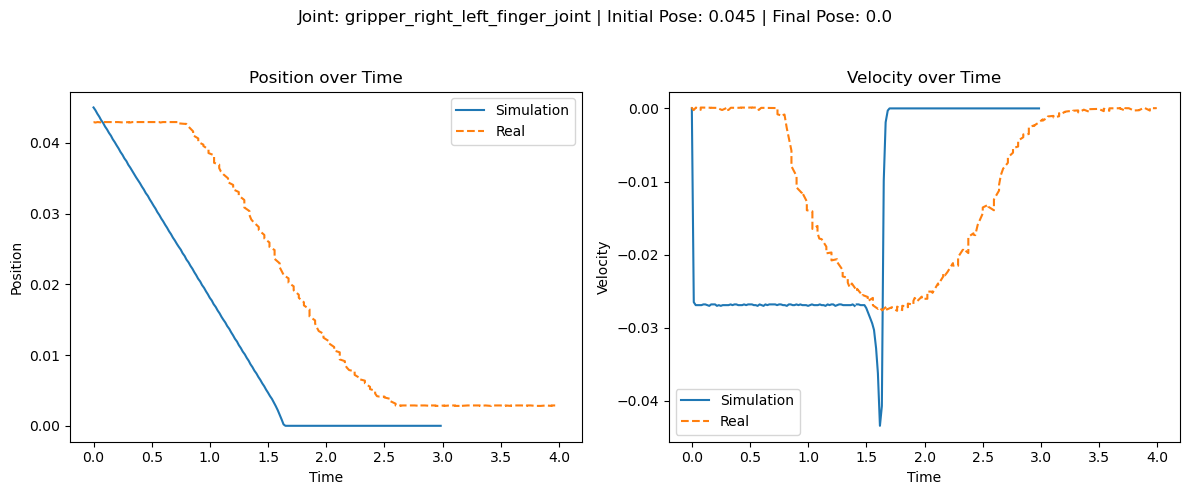

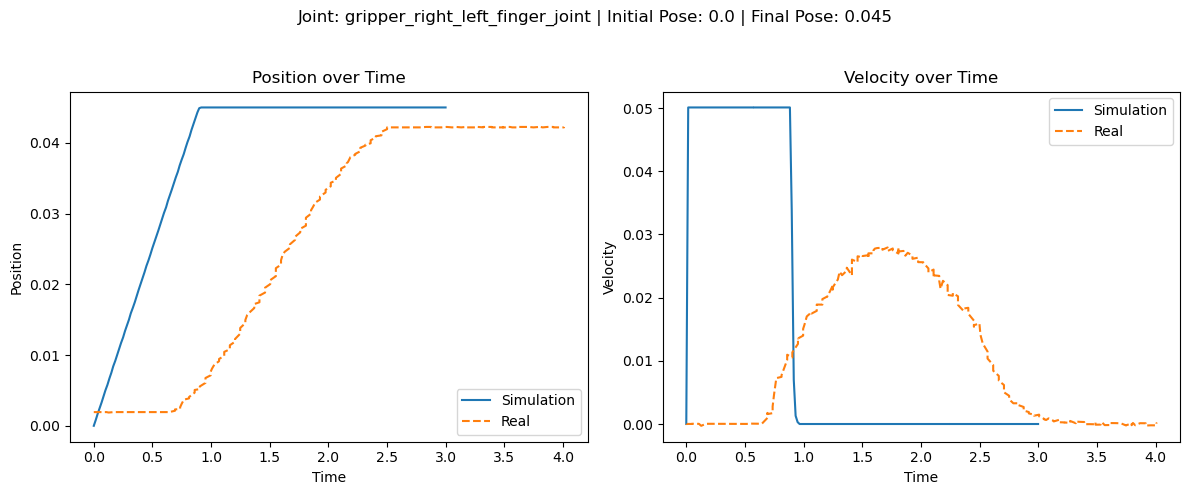

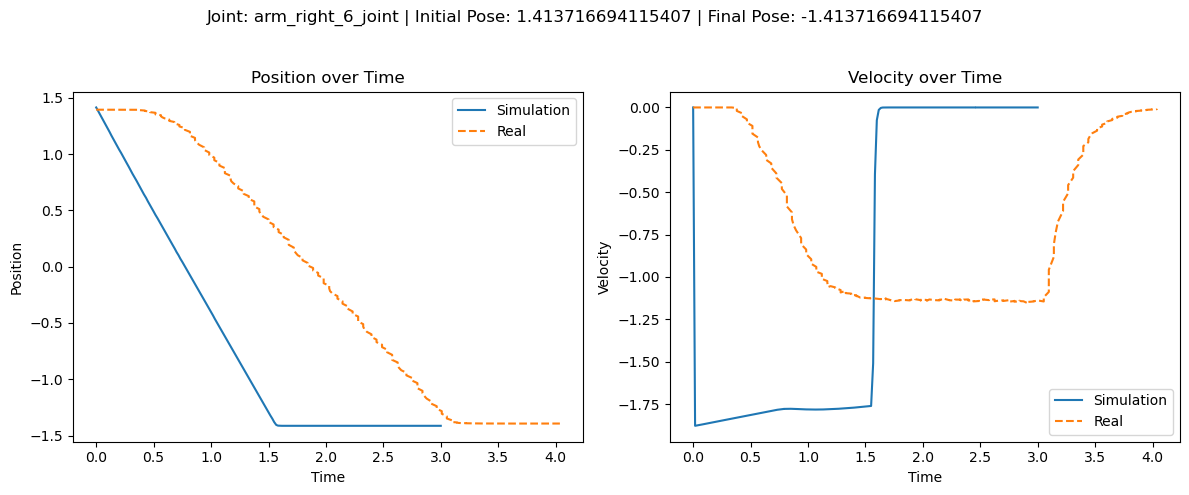

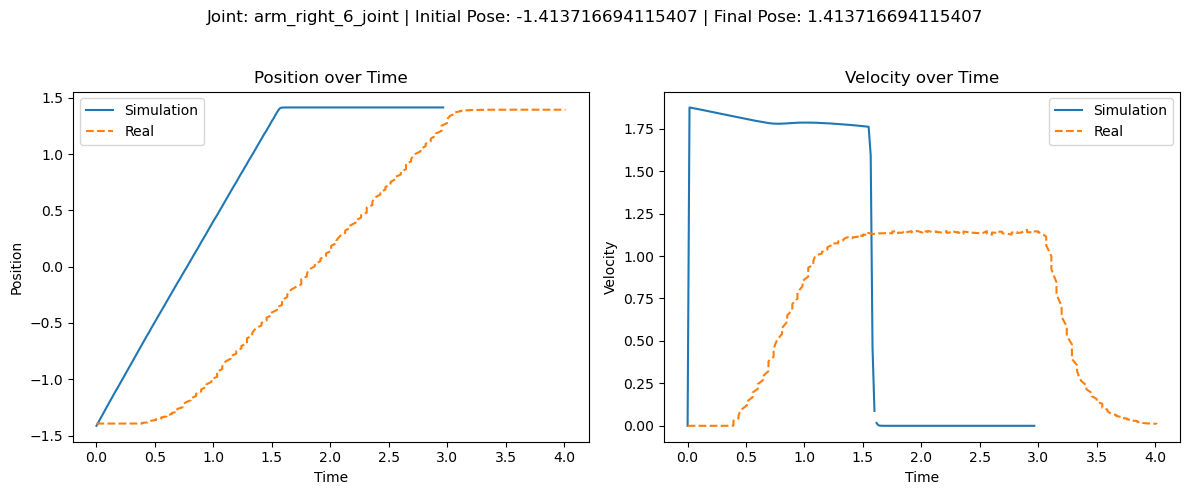

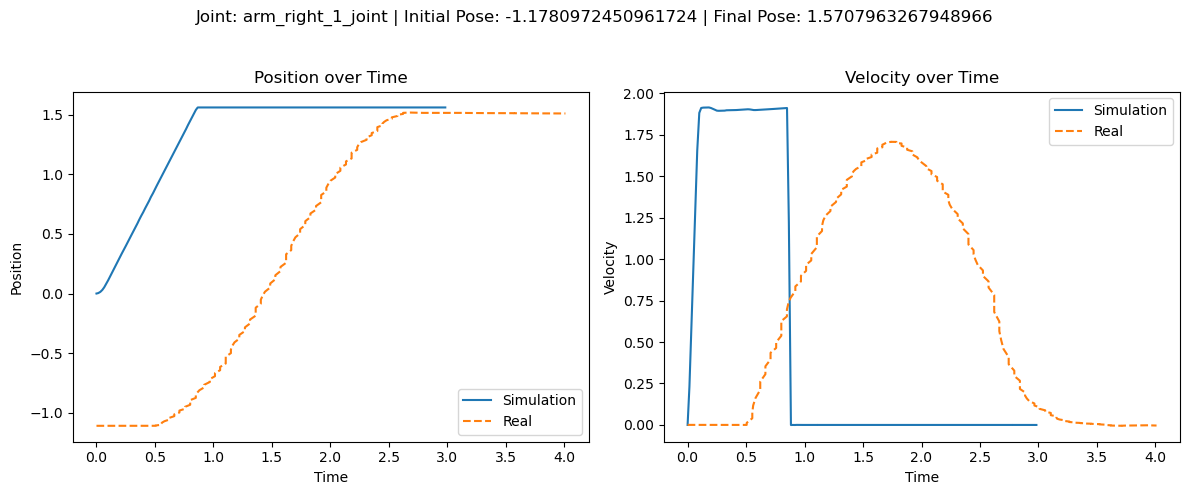

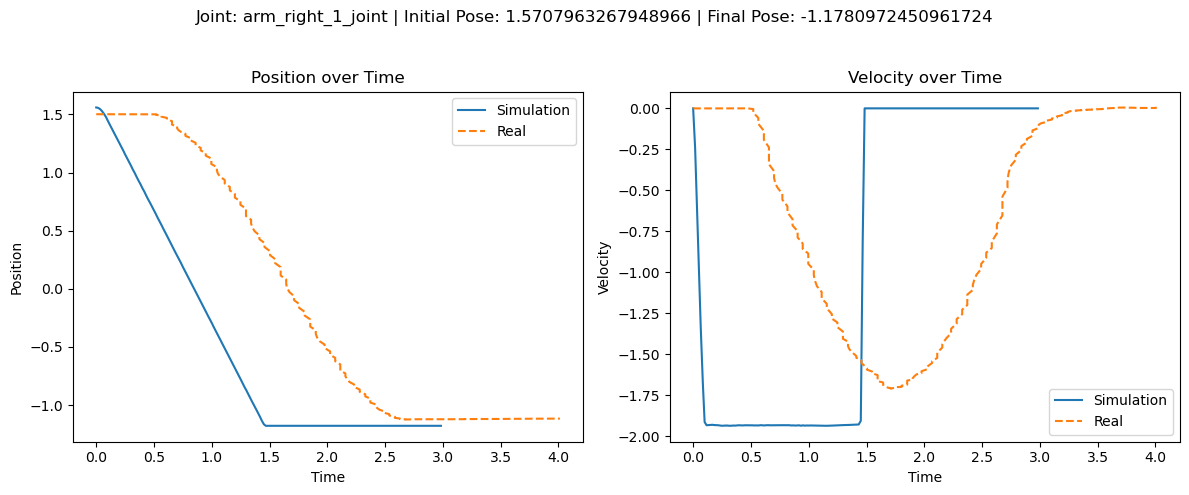

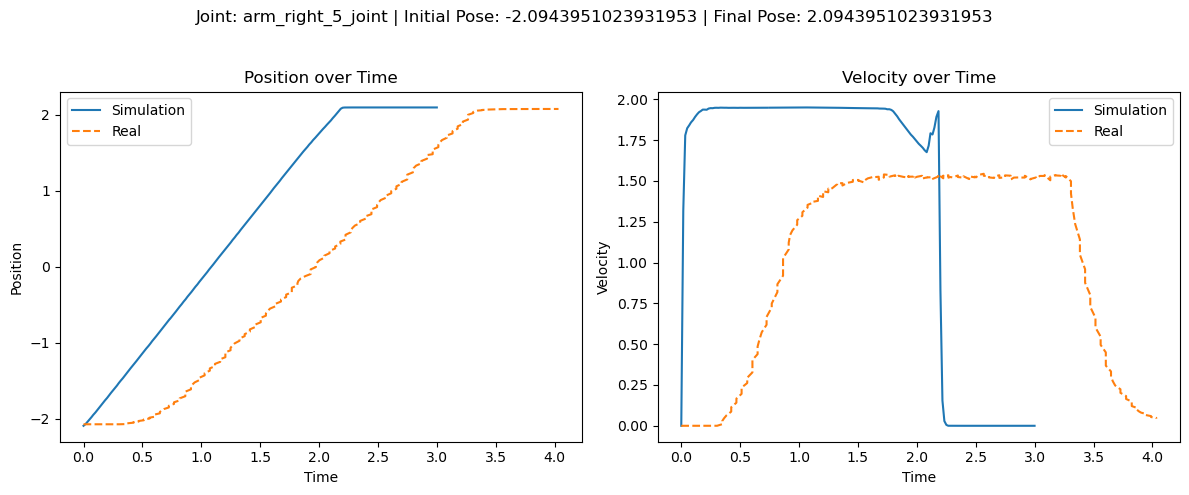

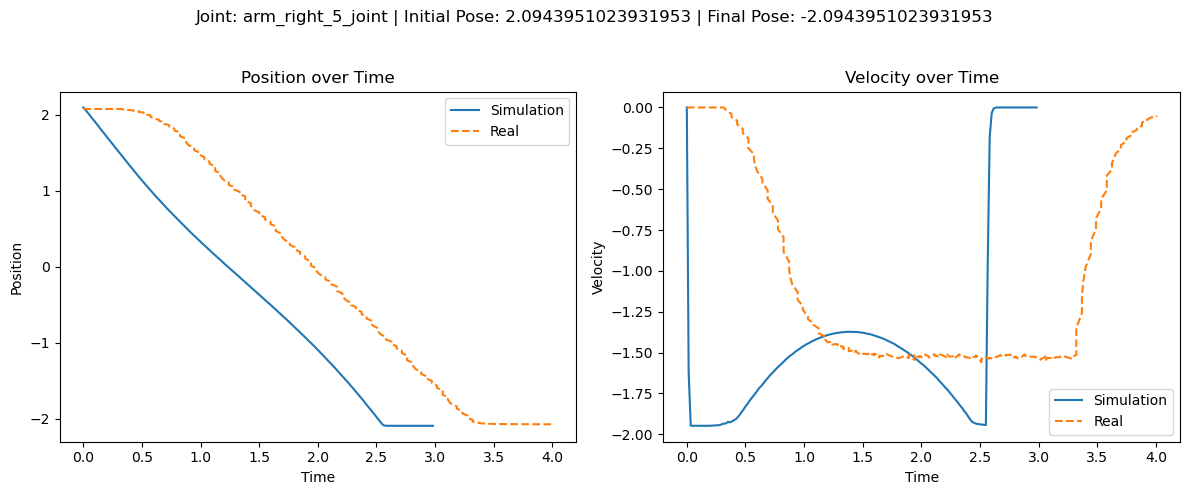

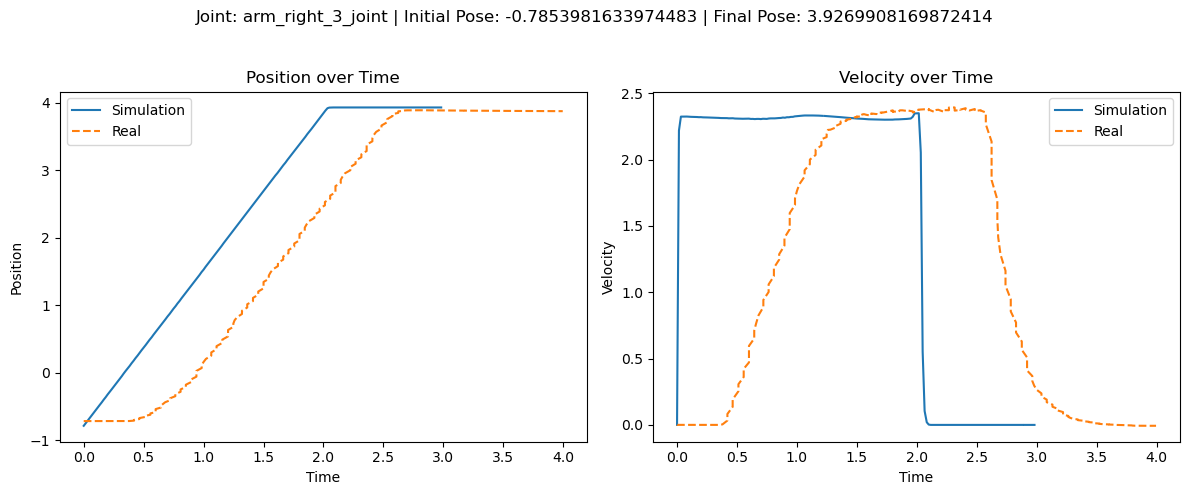

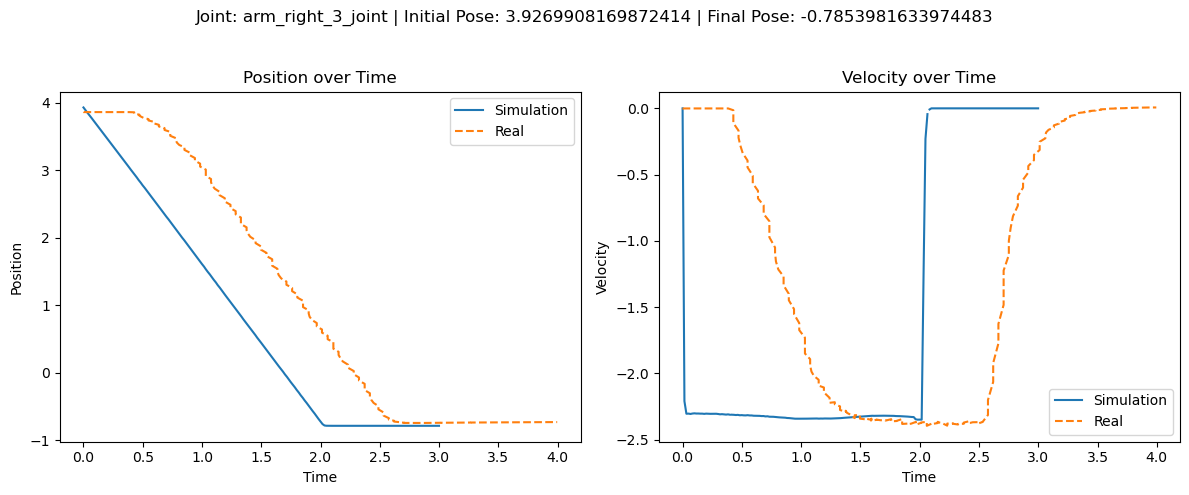

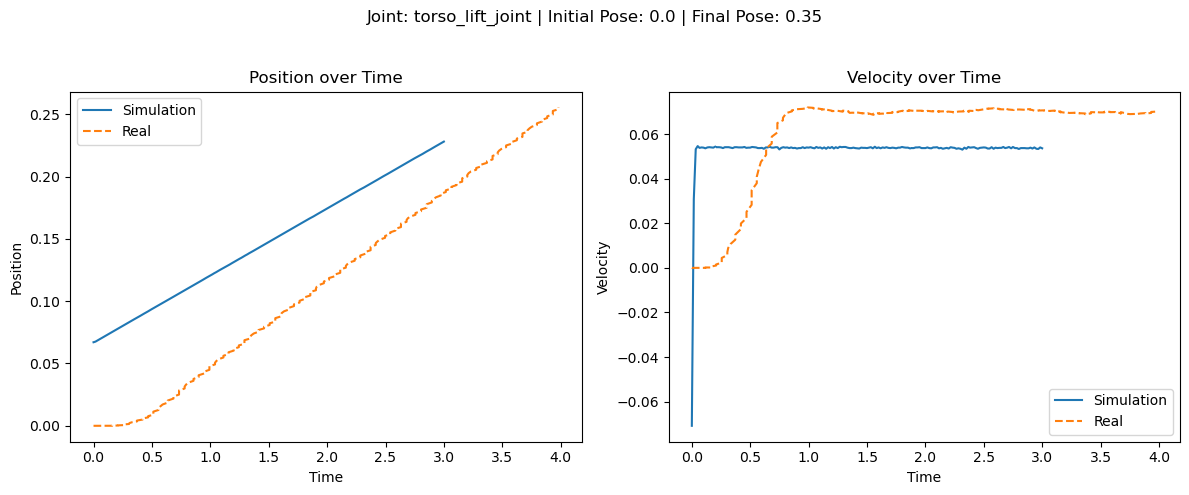

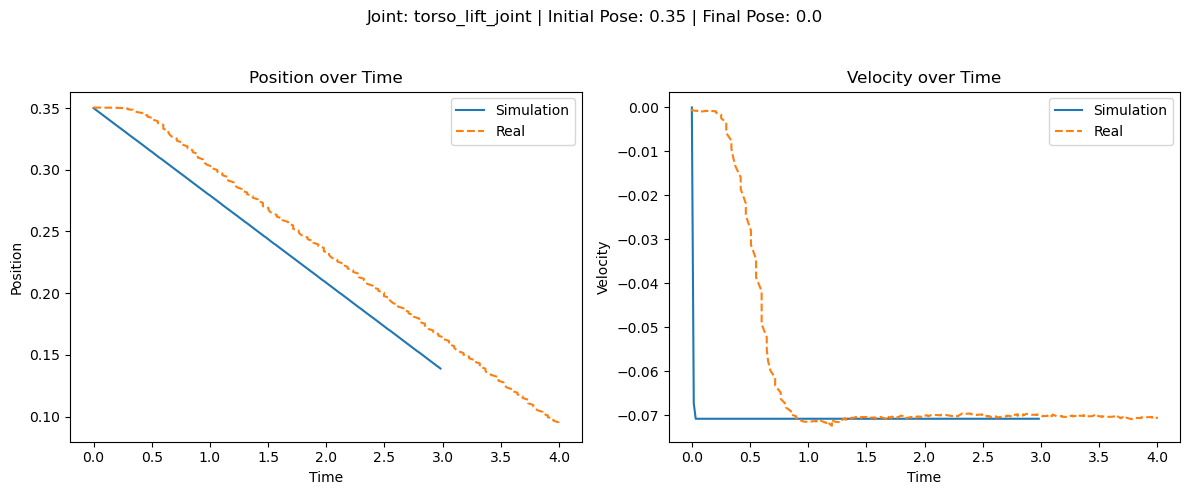

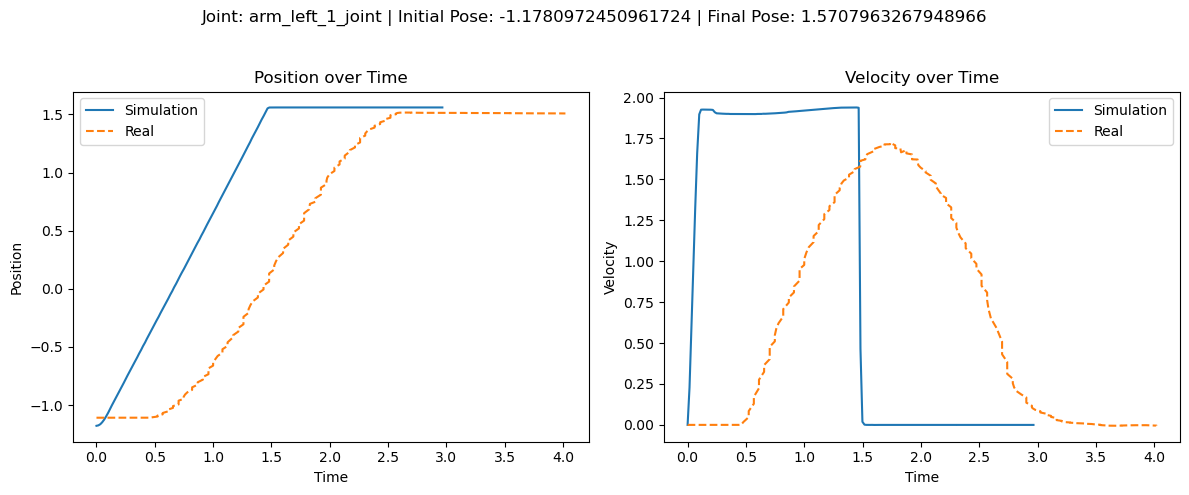

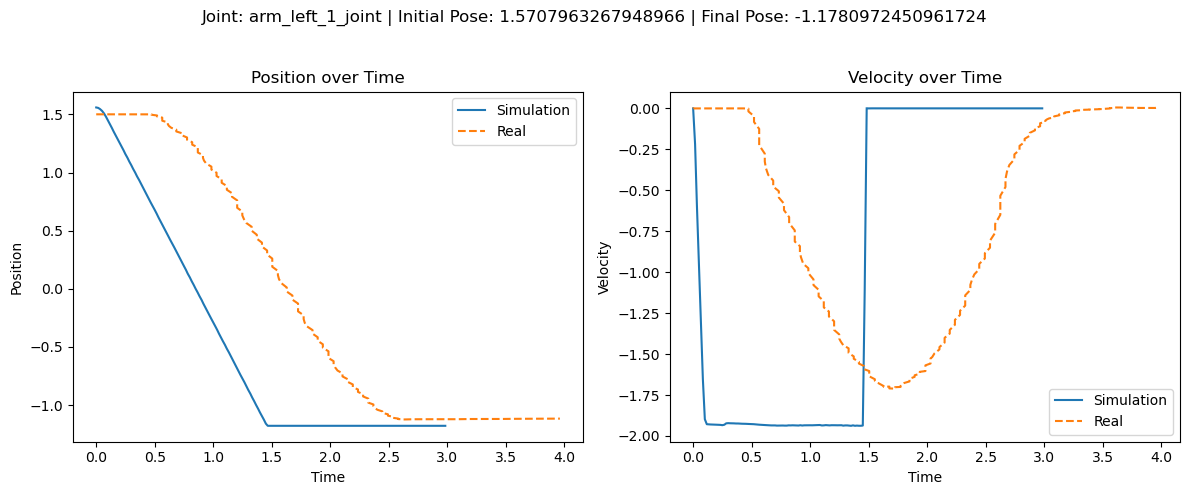

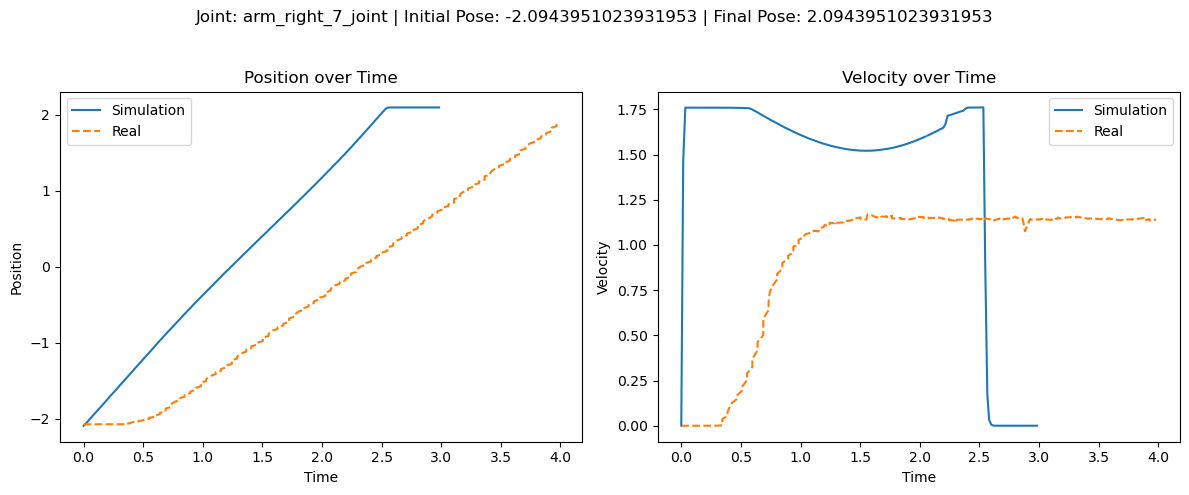

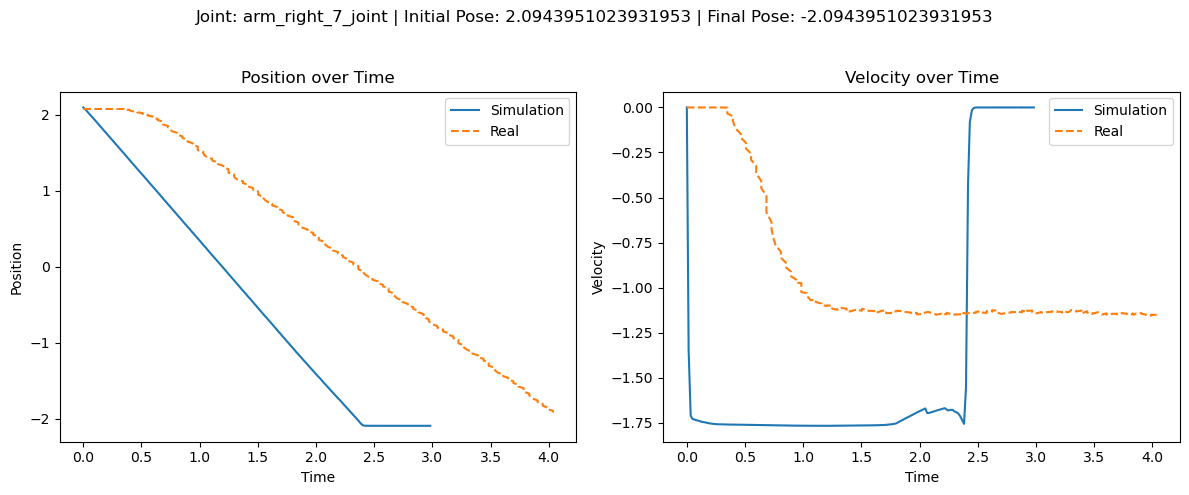

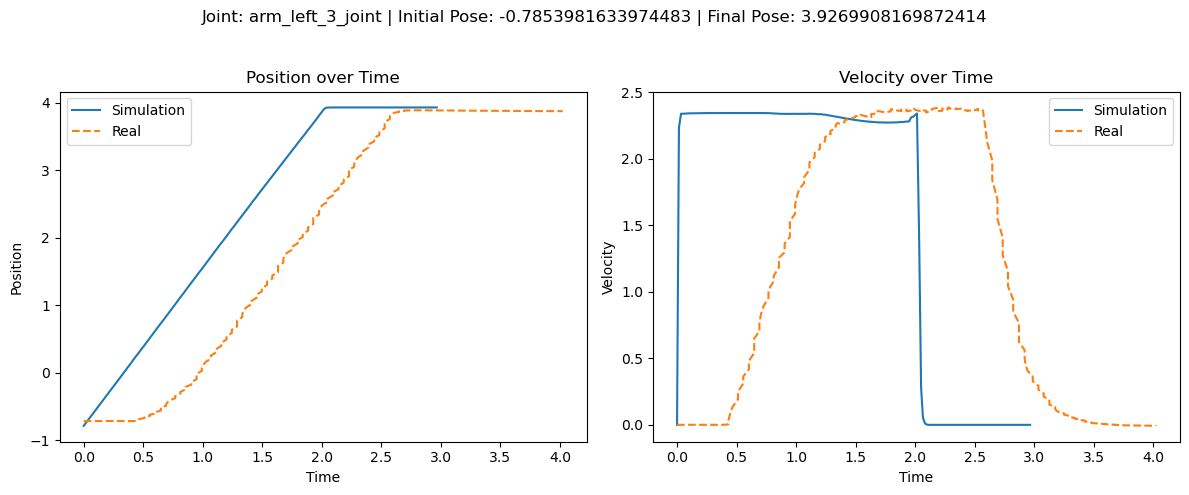

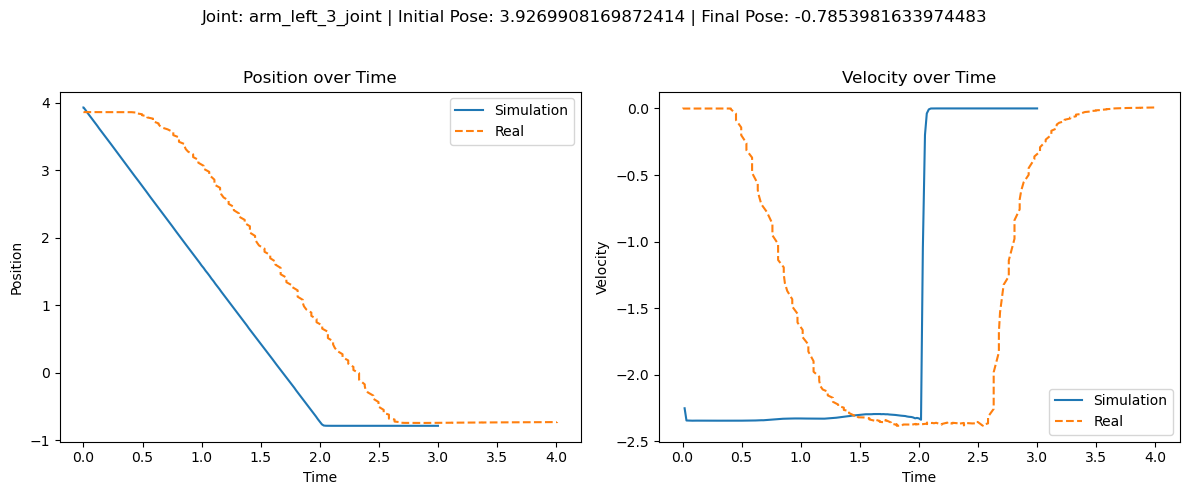

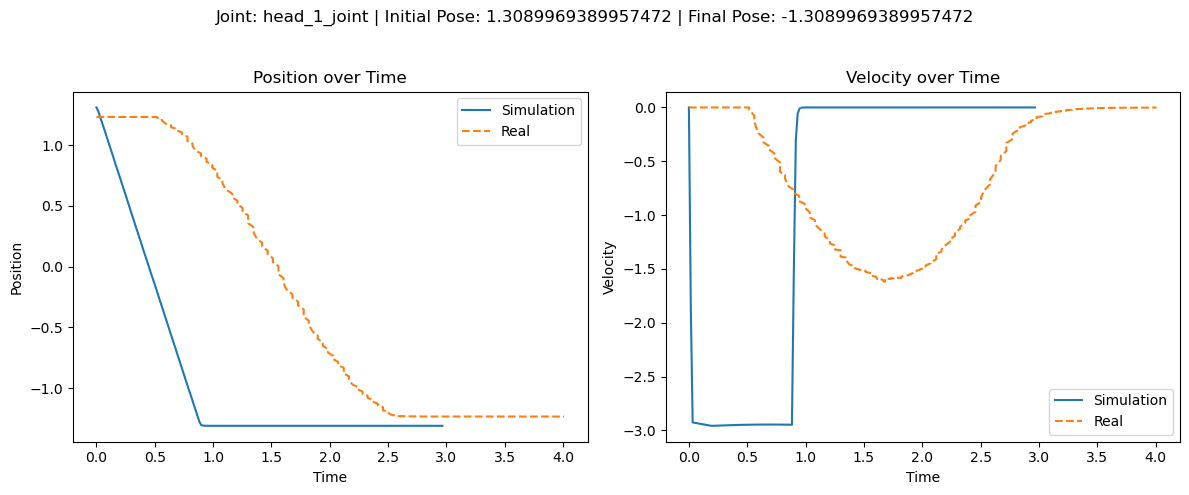

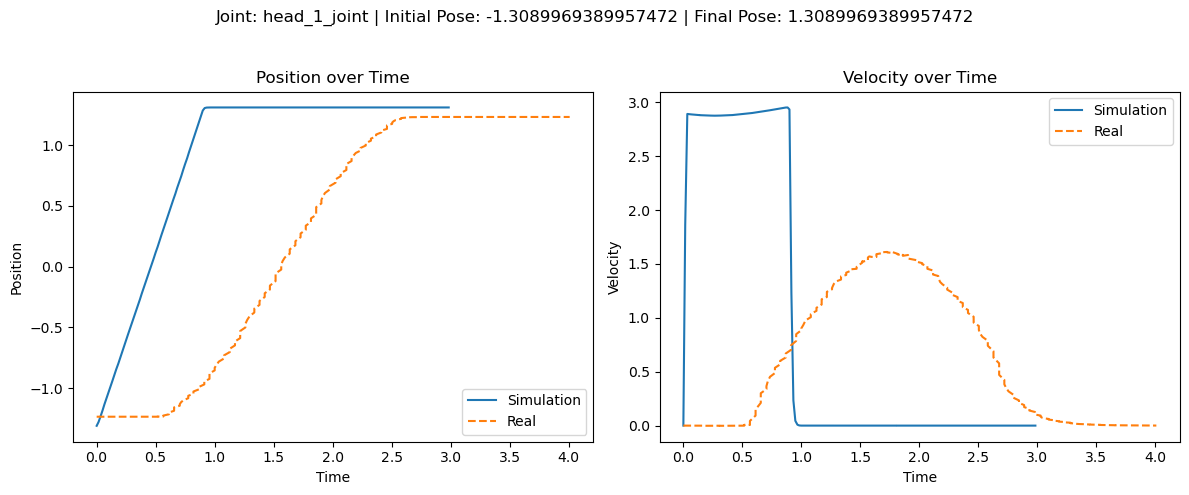

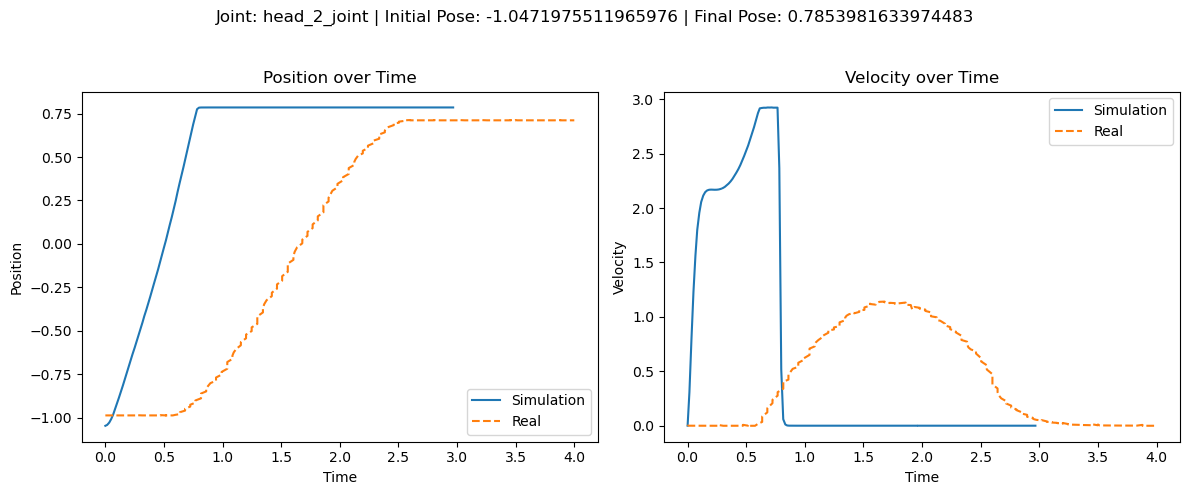

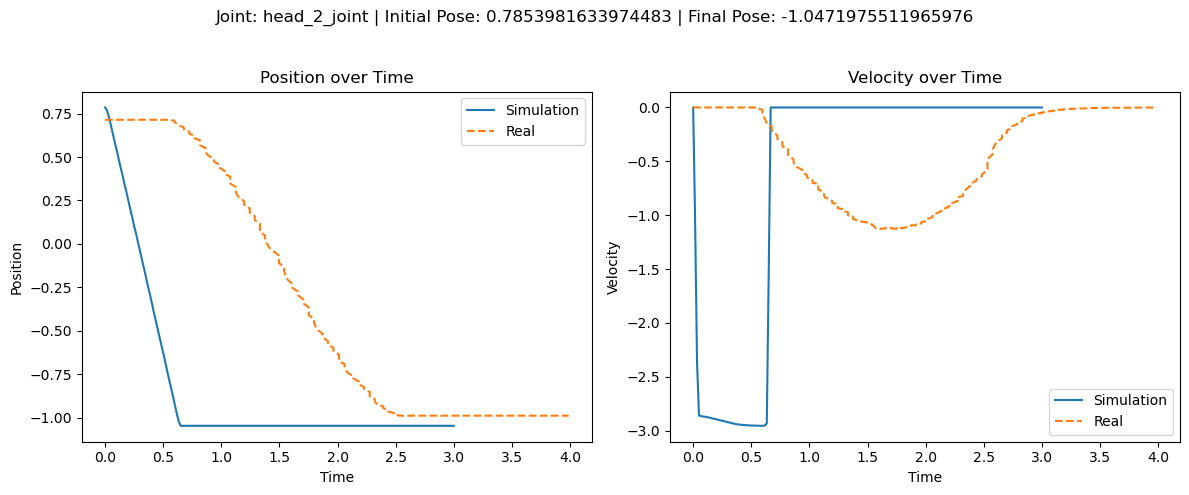

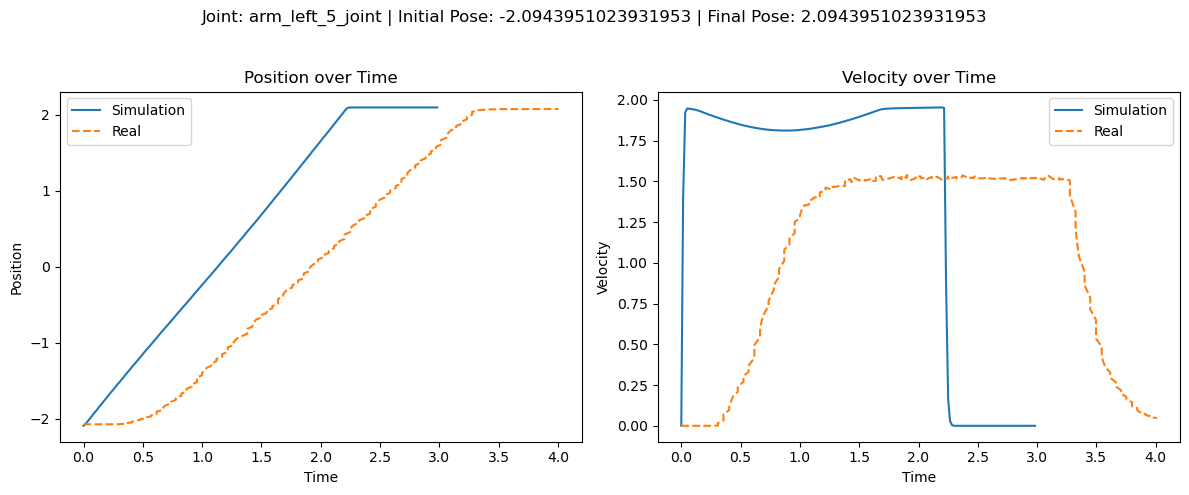

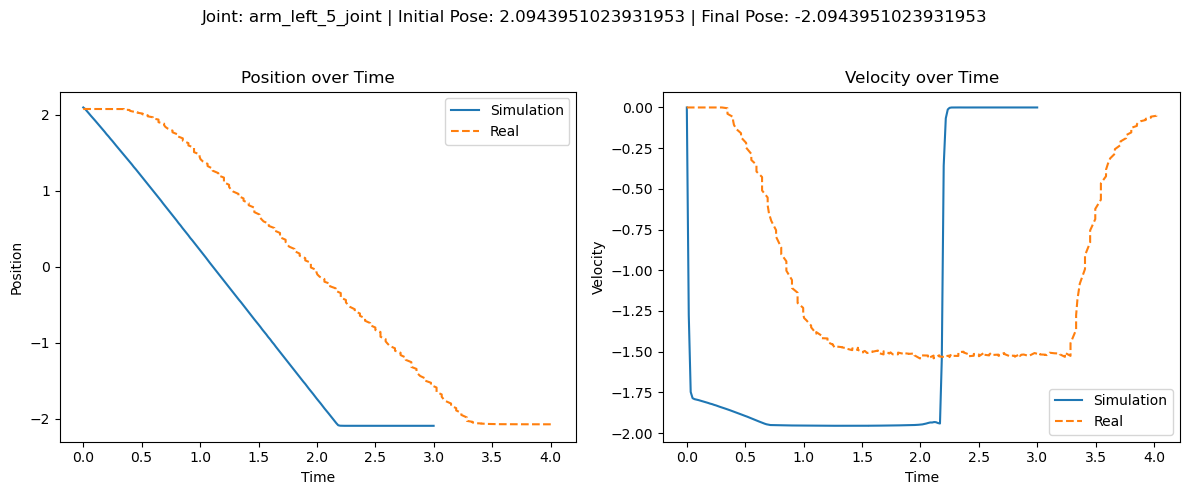

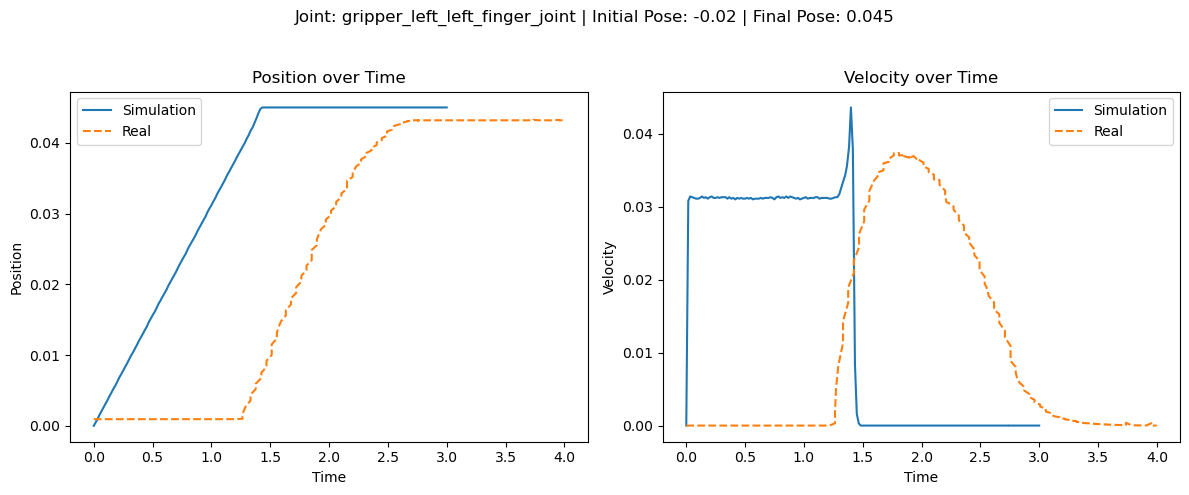

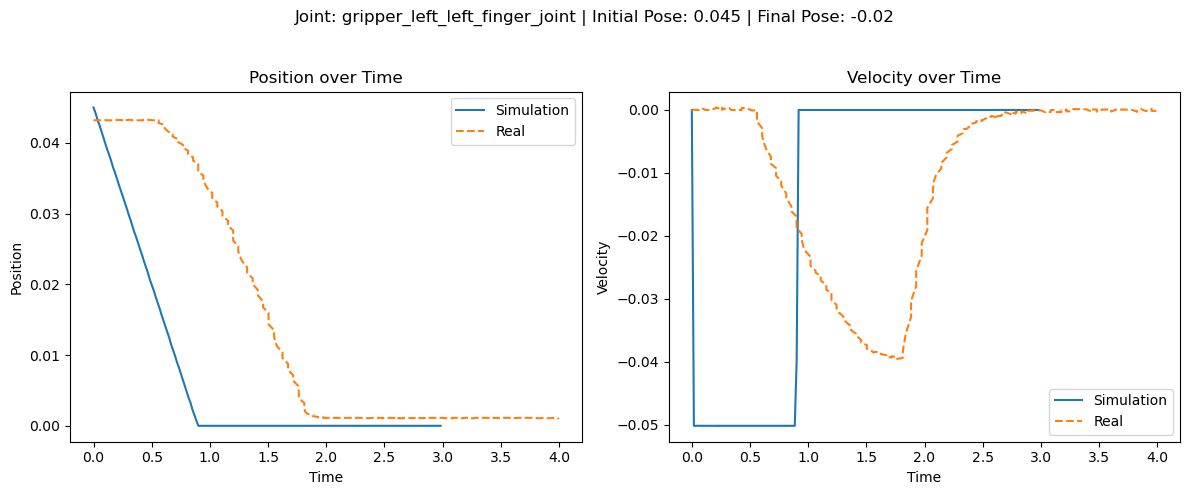

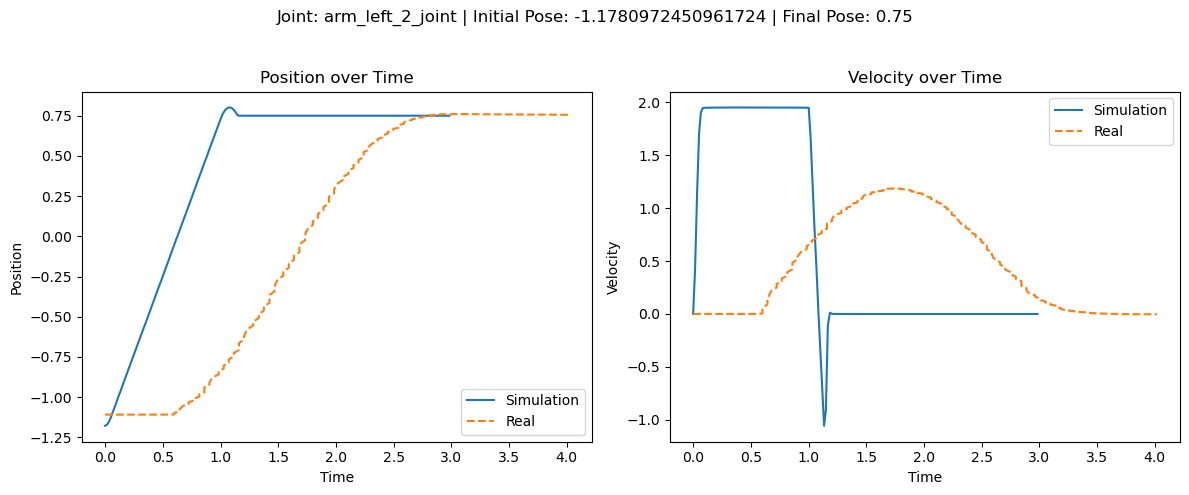

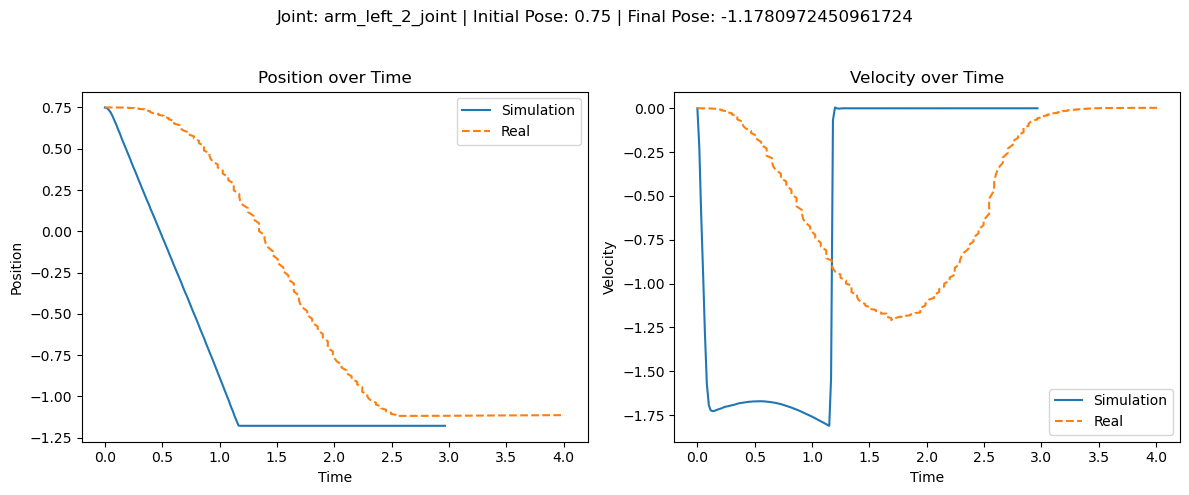

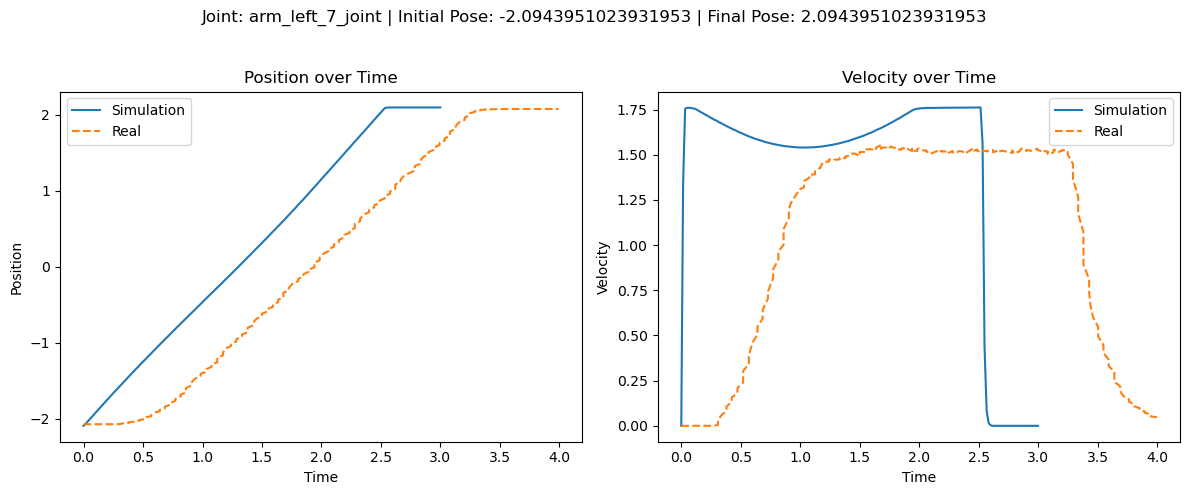

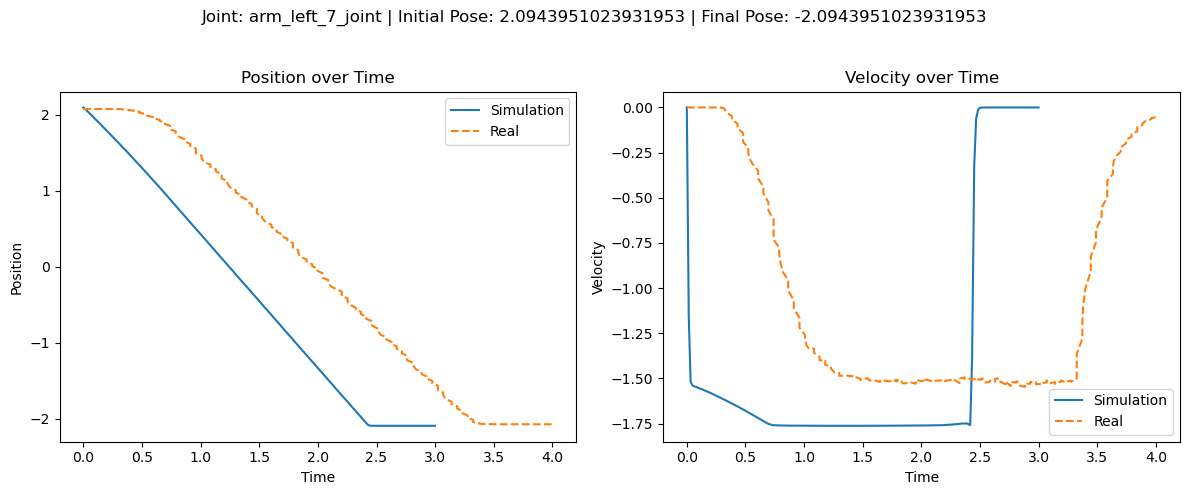

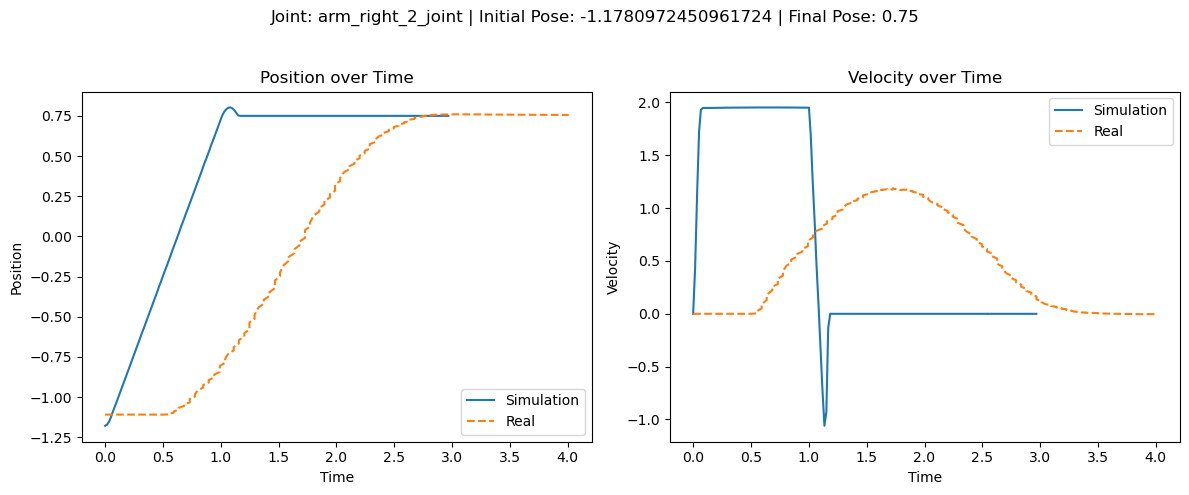

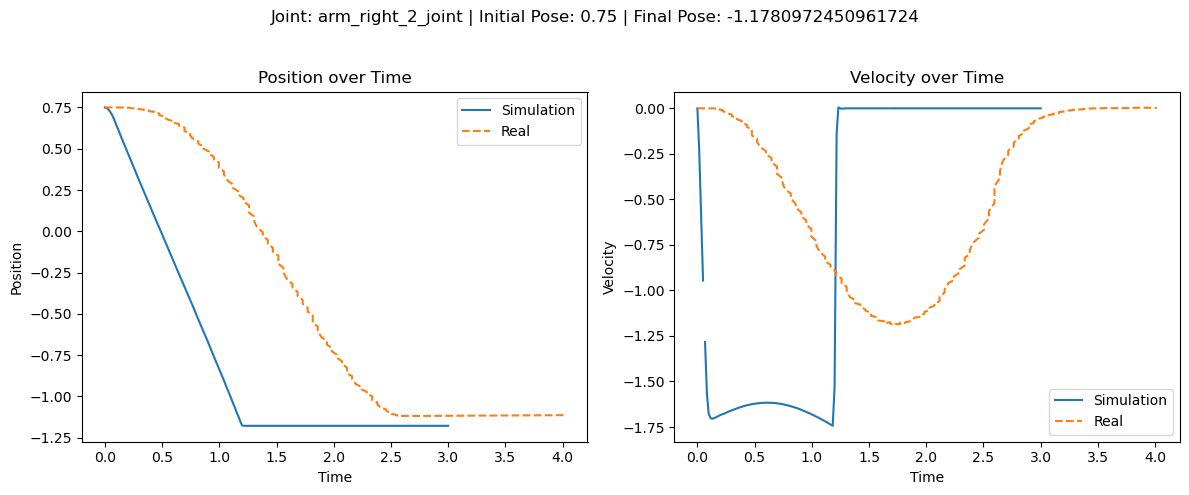

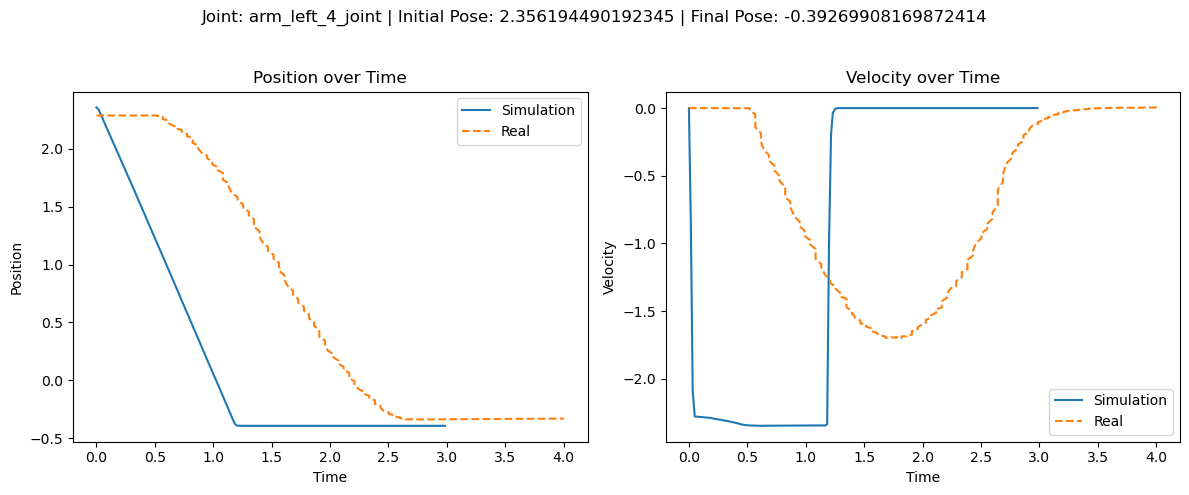

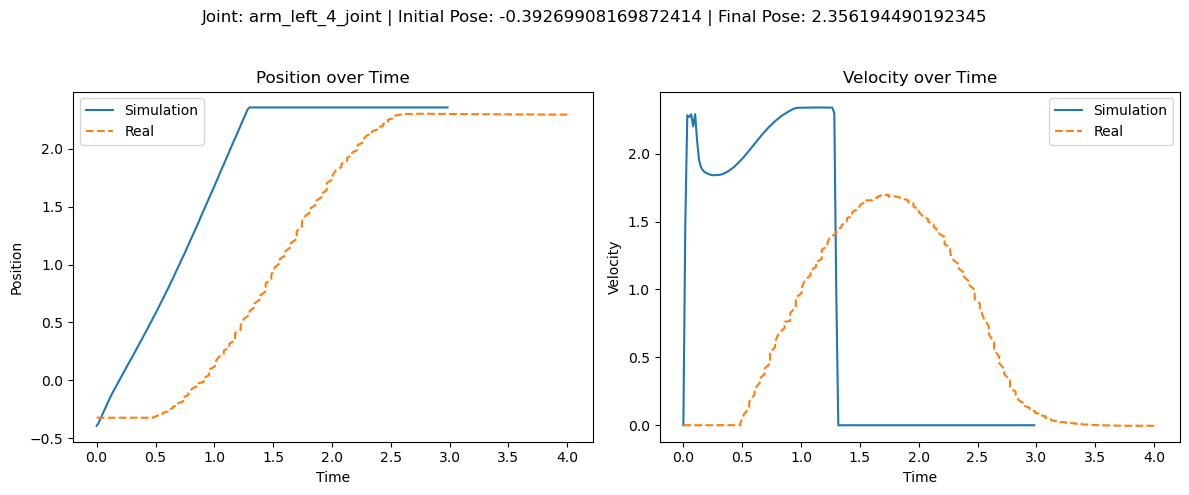

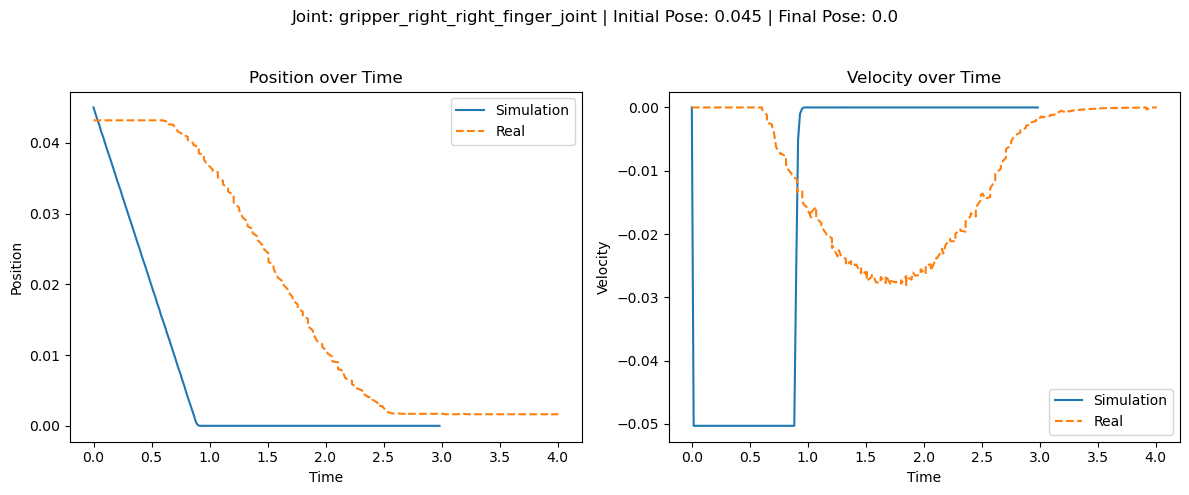

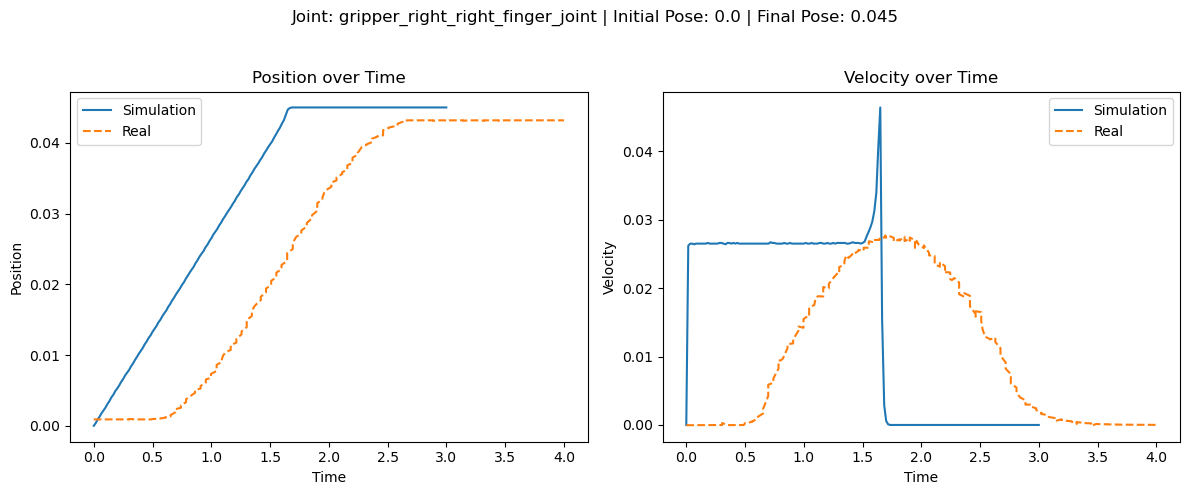

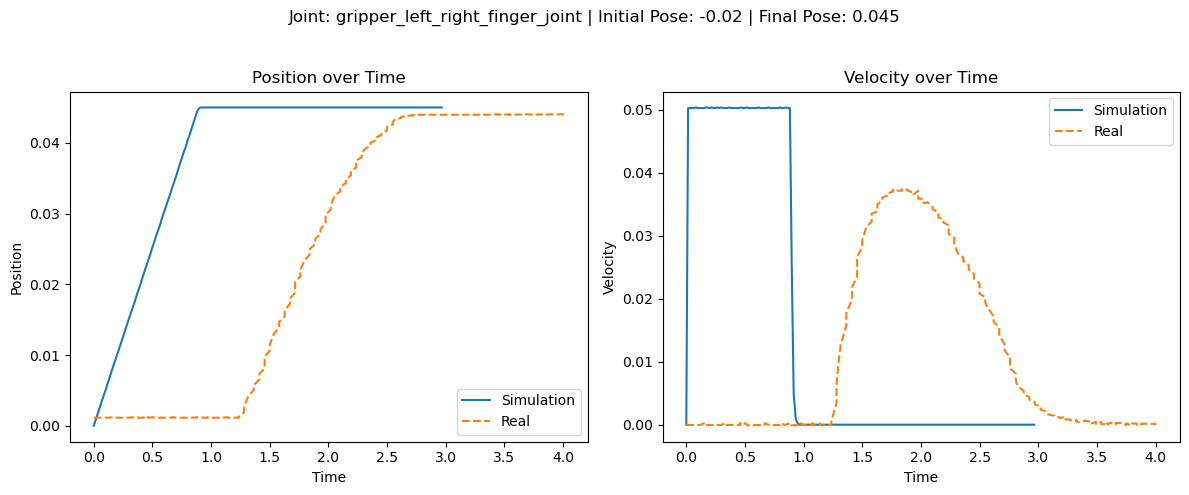

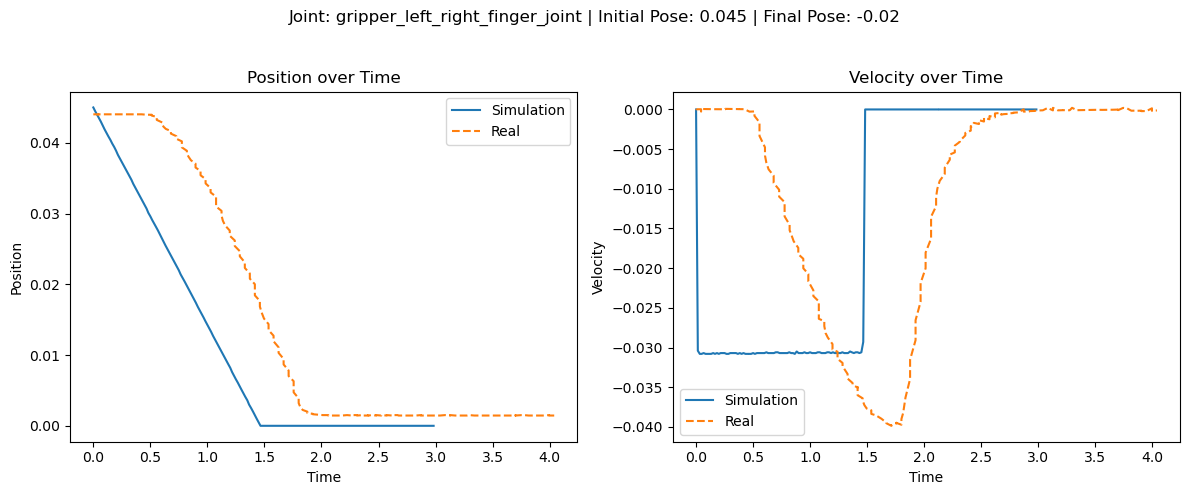

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set up the root directories
root_dir_sim = "../data/sim/recordings"
root_dir_real = "../data/real/recordings3sec"

# Traverse the simulation directory structure to find all relevant CSV files
for joint_dir in os.listdir(root_dir_sim):
    joint_path_sim = os.path.join(root_dir_sim, joint_dir, "poses")
    joint_path_real = os.path.join(root_dir_real, joint_dir, "poses")

    if os.path.isdir(joint_path_sim) and os.path.isdir(joint_path_real):
        for csv_file in os.listdir(joint_path_sim):
            if csv_file.endswith(".csv"):
                # Extract initial and final pose from the file name
                initial_pose, final_pose = map(float, csv_file.replace(".csv", "").split("_"))

                # Read the simulation CSV file
                sim_csv_path = os.path.join(joint_path_sim, csv_file)
                sim_data = pd.read_csv(sim_csv_path)

                # Adjust simulation time to start at 0
                sim_data['simulation_time'] -= sim_data['simulation_time'].iloc[0]

                # Read the corresponding real CSV file
                real_csv_path = os.path.join(joint_path_real, csv_file)
                if os.path.exists(real_csv_path):
                    real_data = pd.read_csv(real_csv_path)

                    # Adjust real timestamp to start at 0
                    real_data['timestamp'] -= real_data['timestamp'].iloc[0]
                else:
                    print(f"Real data file not found for {csv_file}")
                    continue

                # Create the figure and subplots
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

                # Plot position data (simulation vs. real)
                ax1.plot(sim_data['simulation_time'], sim_data['position'], label='Simulation')
                ax1.plot(real_data['timestamp'], real_data['position'], label='Real', linestyle='--')
                ax1.set_title("Position over Time")
                ax1.set_xlabel("Time")
                ax1.set_ylabel("Position")
                ax1.legend()

                # Plot velocity data (simulation vs. real)
                ax2.plot(sim_data['simulation_time'], sim_data['velocity'], label='Simulation')
                ax2.plot(real_data['timestamp'], real_data['velocity'], label='Real', linestyle='--')
                ax2.set_title("Velocity over Time")
                ax2.set_xlabel("Time")
                ax2.set_ylabel("Velocity")
                ax2.legend()

                # Set overall title with joint name, initial pose, and final pose
                fig.suptitle(f"Joint: {joint_dir} | Initial Pose: {initial_pose} | Final Pose: {final_pose}")

                # Adjust layout to make space for the title
                plt.tight_layout(rect=[0, 0, 1, 0.95])

                # Display the plot in the notebook
                plt.show()